In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
names = ["age", "workclass", "final_wt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
df_train = pd.read_csv('Classification/adult_dataset/adult.train.csv', names=names)
df_test = pd.read_csv('Classification/adult_dataset/adult.test.csv', names=names)
df_train

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
45839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45842 entries, 0 to 45841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45842 non-null  int64 
 1   workclass       43227 non-null  object
 2   final_wt        45842 non-null  int64 
 3   education       45842 non-null  object
 4   education-num   45842 non-null  int64 
 5   marital-status  45842 non-null  object
 6   occupation      43217 non-null  object
 7   relationship    45842 non-null  object
 8   race            45842 non-null  object
 9   sex             45842 non-null  object
 10  capital-gain    45842 non-null  int64 
 11  capital-loss    45842 non-null  int64 
 12  hours-per-week  45842 non-null  int64 
 13  native-country  45033 non-null  object
 14  salary          45842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (

In [122]:
## Function for labeling
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.-0.18, 1.01*height, "%s" % int(height), size=20, family="Times new roman")

/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/1653689038.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax1.show()


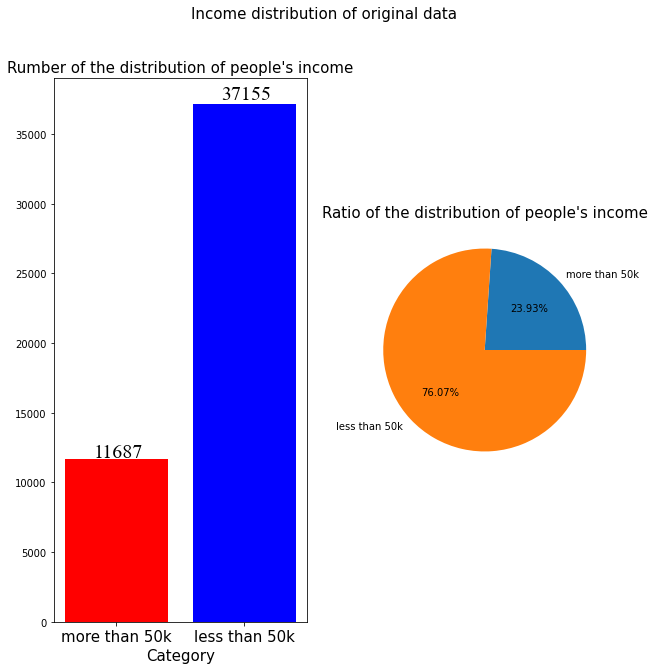

In [123]:
# Data analytics
# The number of people earning more than 50k (Original data)
more_than_50k = len([salary for salary in df_train['salary'] if salary == " >50K"]) + len([salary for salary in df_test['salary'] if salary == " >50K"])
less_than_50k = len(df_train) + len(df_test) - more_than_50k
ratio_more_than_50k = more_than_50k/(more_than_50k + less_than_50k)
ratio_less_than_50k = less_than_50k/(more_than_50k + less_than_50k)
salary_list = [more_than_50k, less_than_50k]
ratio_list = [ratio_more_than_50k, ratio_less_than_50k]

#Draw the graph
#Bar
ax1 = plt.figure(figsize=(10, 10))
plt.suptitle("Income distribution of original data", fontsize=15)
plt.subplot(1,2,1)
plt.title("Rumber of the distribution of people's income", fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
fig_salary = plt.bar(['more than 50k', 'less than 50k'], salary_list, color=['r', 'b'])
autolabel(fig_salary)

#Pie
plt.subplot(1,2,2)
plt.title("Ratio of the distribution of people's income", fontsize=15)
plt.pie(ratio_list, labels=['more than 50k', 'less than 50k'],autopct="%.2f%%")
plt.savefig("Income distribution of original data.png")
ax1.show()

In [6]:
#For global process, we should delete the lines with "space"
df_global_train = df_train.dropna()
df_global_test = df_test.dropna()

In [7]:
# Numeric mapping
map_workclass = {
    " Private": 0, 
    " Self-emp-not-inc": 1, 
    " Self-emp-inc": 2, 
    " Federal-gov": 3, 
    " Local-gov": 4, 
    " State-gov": 5, 
    " Without-pay": 6, 
    " Never-worked": 7
}
map_edu = {
    " Preschool": 0,
    " 1st-4th": 1,
    " 5th-6th": 2,
    " 7th-8th": 3,
    " 9th": 4,
    " 10th": 5,
    " 11th": 6,
    " 12th": 7,
    " HS-grad": 8,
    " Some-college": 9,
    " Prof-school": 10, 
    " Assoc-acdm": 11,
    " Assoc-voc": 12, 
    " Bachelors": 13, 
    " Masters":14, 
    " Doctorate":15
}

map_marry = {
    " Married-civ-spouse": 0, 
    " Divorced": 1, 
    " Never-married": 2, 
    " Separated": 3, 
    " Widowed": 4, 
    " Married-spouse-absent": 5, 
    " Married-AF-spouse": 6
}

map_job = {
    " Tech-support": 0, 
    " Craft-repair": 1, 
    " Sales": 2, 
    " Exec-managerial": 3, 
    " Prof-specialty": 4, 
    " Handlers-cleaners": 5, 
    " Machine-op-inspct": 6, 
    " Adm-clerical": 7, 
    " Farming-fishing": 8, 
    " Transport-moving": 9, 
    " Priv-house-serv": 10, 
    " Protective-serv": 11, 
    " Armed-Forces": 12,
    " Other-service": 13,
}

map_relation = {
    " Wife": 0, 
    " Own-child": 1, 
    " Husband": 2, 
    " Not-in-family": 3, 
    " Other-relative": 4, 
    " Unmarried": 5
}

map_race = {
    " White": 0, 
    " Black": 1,
    " Asian-Pac-Islander": 2, 
    " Amer-Indian-Eskimo": 3, 
    " Other": 4
}

map_sex = {
    " Female": 0,
    " Male": 1
}

map_country = {
    " United-States": 1, 
    " Cambodia": 2, 
    " England": 3, 
    " Puerto-Rico": 4, 
    " Canada": 5, 
    " Germany": 6, 
    " Outlying-US(Guam-USVI-etc)": 7, 
    " India": 8, 
    " Japan": 9, 
    " Greece": 10, 
    " South": 11, 
    " China": 12, 
    " Cuba": 13, 
    " Iran": 14, 
    " Honduras": 15, 
    " Philippines": 16, 
    " Italy": 17, 
    " Poland": 18, 
    " Jamaica": 19, 
    " Vietnam": 20, 
    " Mexico": 21, 
    " Portugal": 22, 
    " Ireland": 23, 
    " France": 24, 
    " Dominican-Republic": 25, 
    " Laos": 27, 
    " Ecuador": 28, 
    " Taiwan": 29, 
    " Haiti": 30, 
    " Columbia": 31, 
    " Hungary": 32, 
    " Guatemala": 33, 
    " Nicaragua": 34, 
    " Scotland": 35, 
    " Thailand": 36, 
    " Yugoslavia": 37, 
    " El-Salvador": 38, 
    " Trinadad&Tobago": 39, 
    " Peru": 40, 
    " Hong": 41, 
    " Holand-Netherlands": 42
}

In [8]:
#Mapping replacement
# for column, col_map in enumerate( [map_workclass, map_edu, map_marry, map_job, map_relation, map_race, map_sex]):
#     df_global_train[column] = df_global_train[column].map(col_map)
#     df_global_test[column] = df_global_test[column].map(col_map)

df_global_train['workclass'] = df_global_train['workclass'].map(map_workclass)
df_global_train['education'] = df_global_train['education'].map(map_edu)
df_global_train['marital-status'] = df_global_train['marital-status'].map(map_marry)
df_global_train['occupation'] = df_global_train['occupation'].map(map_job)
df_global_train['relationship'] = df_global_train['relationship'].map(map_relation)
df_global_train['race'] = df_global_train['race'].map(map_race)
df_global_train['sex'] = df_global_train['sex'].map(map_sex)
df_global_train['native-country'] = df_global_train['native-country'].map(map_country)

df_global_test['workclass'] = df_global_test['workclass'].map(map_workclass)
df_global_test['education'] = df_global_test['education'].map(map_edu)
df_global_test['marital-status'] = df_global_test['marital-status'].map(map_marry)
df_global_test['occupation'] = df_global_test['occupation'].map(map_job)
df_global_test['relationship'] = df_global_test['relationship'].map(map_relation)
df_global_test['race'] = df_global_test['race'].map(map_race)
df_global_test['sex'] = df_global_test['sex'].map(map_sex)
df_global_test['native-country'] = df_global_test['native-country'].map(map_country)

/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/1843969349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_train['workclass'] = df_global_train['workclass'].map(map_workclass)
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/1843969349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_train['education'] = df_global_train['education'].map(map_edu)
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/1843969349.py:8: SettingWithCopyWarning: 


In [161]:
## Process the target prediction by using One-Hot Coding
###Training set
income_train_raw = df_global_train['salary']
income_train_raw.unique()

y_train = income_train_raw.apply(lambda x: int(x==" >50K"))

###Testing set
income_test_raw = df_global_test['salary']
income_test_raw.unique()

y_test = income_test_raw.apply(lambda x: int(x==" >50K"))

#Then, the result will be like:
## If the income is over 50K, the rusult is 1; otherwise, it is 0.

print(len(y_test))

2773


## Step 1: Global Prediction

### Logistic Regression

### Due to the type of result, I plan to use logistic regression to predict the result.

#### 1. Normal model

In [10]:
X_df_global_train, X_df_global_test = df_global_train.iloc[:, :-1], df_global_test.iloc[:, :-1]
#Train the model
lr_normal = linear_model.LogisticRegression()
# lr = linear_model.LogisticRegression(penalty="l1", solver="liblinear")

print("training...")
performance_global = lr_normal.fit(X_df_global_train, y_train)

#Predict and evaluate the model
print("Testing...")
prediction_global = lr_normal.predict(X_df_global_test)
print(Counter(prediction_global))

## Intercept and coefficiency
intercept_global = performance_global.intercept_
coef_global = performance_global.coef_

print("Coef: {0}, \nIntercept:{1}".format(coef_global,intercept_global))

training...
Testing...
Counter({0: 2493, 1: 280})
Coef: [[-7.36906025e-03  1.82853780e-05 -3.22414695e-06 -1.36604507e-03
  -1.73424311e-03 -1.50979110e-03 -3.73731473e-03 -1.45873086e-03
  -1.75494836e-04  2.01326926e-05  3.39207884e-04  7.79035286e-04
  -8.47787585e-03 -1.32518273e-03]], 
Intercept:[-0.00036503]


#### 2.Optimized model

In [11]:

lr_op = linear_model.LogisticRegression(penalty="l1", solver="liblinear", tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1)
#Train the model
print("Training...")
performance_glo_op = lr_op.fit(X_df_global_train, y_train)

#Predict and evaluate the model
print('Testing...')
prediction_glo_op = lr_op.predict(X_df_global_test)
print(Counter(prediction_glo_op))
## Intercept and coefficiency
intercept_glo_op = performance_glo_op.intercept_
coef_glo_op = performance_glo_op.coef_

print("Coef: {0}, \nIntercept:{1}".format(coef_glo_op,intercept_glo_op))

Training...
Testing...
Counter({0: 2237, 1: 536})
Coef: [[ 3.00529281e-02  3.17223059e-02  5.49250578e-07  1.01590521e-01
   2.01006996e-01 -8.66346834e-01 -8.06083506e-02 -3.18905226e-01
  -6.34641546e-02  4.05389327e-01  3.18375342e-04  6.54933886e-04
   2.75401151e-02 -1.32458706e-02]], 
Intercept:[-5.64396397]


In [157]:
#Data of prediction result
#Prediction ratio:
pre_glo_Counter = Counter(prediction_global)
pre_glo_op_Counter = Counter(prediction_glo_op)

# Accuracy
as_global = round(accuracy_score(y_test,prediction_global), 4)
as_glo_op = round(accuracy_score(y_test,prediction_glo_op), 4)

#Precision score
ps_global = round(precision_score(y_test, prediction_global), 4)
ps_glo_op = round(precision_score(y_test, prediction_glo_op), 4)

#Recall score
rs_global = round(recall_score(y_test, prediction_global, average='binary', pos_label=1), 4)
rs_glo_op = round(recall_score(y_test, prediction_glo_op, average='binary', pos_label=1), 4)

#f1-score
fs_global = round(f1_score(y_test, prediction_global, average='binary', pos_label=1), 4)
fs_glo_op = round(f1_score(y_test, prediction_glo_op, average='binary', pos_label=1), 4)

#classification_report
report_glo_normal = classification_report(y_test, prediction_global)
report_glo_op = classification_report(y_test, prediction_glo_op)

#cross_val
cv_glo_normal = cross_val_score(lr_normal, X_df_global_train, y_train)
cv_glo_op = cross_val_score(lr_op, X_df_global_train, y_train)

##Report Printing
print("The data and report for normal model of Logistic Regression...\n")
print("Ratio of the prediction: \n '>50K':%.2f%%, '<=50K':%.2f%%"% (pre_glo_Counter.get(1) / len(y_test) * 100, pre_glo_Counter.get(0) / len(y_test) * 100))
print("Score of the model:{0}".format(cv_glo_normal.mean()))
print(report_glo_normal)
print('Data of the prediction: 1. Accuracy Score: {0}, 2.Precision Score:{1}, 3.recall_score:{2}, 4.f1_score:{3}.\n'.format(as_global, ps_global, rs_global, fs_global))


print("The data and report for optimized model of Logistic Regression...\n")
print("Ratio of the prediction: \n '>50K':%.2f%%, '<=50K':%.2f%%"% (pre_glo_op_Counter.get(1) / len(y_test) * 100, pre_glo_op_Counter.get(0) / len(y_test) * 100))
print("Score of the model:{0}".format(cv_glo_op.mean()))
print(report_glo_op)
print('Data of the prediction: 1. Accuracy Score: {0}, 2.Precision Score:{1}, 3.recall_score:{2}, 4.f1_score:{3}.'.format(as_glo_op, ps_glo_op, rs_glo_op, fs_glo_op))

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

The data and report for normal model of Logistic Regression...

Ratio of the prediction: 
 '>50K':10.10%, '<=50K':89.90%
Score of the model:0.7900303822822885
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2075
           1       0.72      0.29      0.42       698

    accuracy                           0.79      2773
   macro avg       0.76      0.63      0.64      2773
weighted avg       0.78      0.79      0.76      2773

Data of the prediction: 1. Accuracy Score: 0.7937, 2.Precision Score:0.725, 3.recall_score:0.2908, 4.f1_score:0.4151.

The data and report for optimized model of Logistic Regression...

Ratio of the prediction: 
 '>50K':19.33%, '<=50K':80.67%
Score of the model:0.8392894372694046
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2075
           1       0.72      0.55      0.62       698

    accuracy                           0.83      2773
   macro avg   

In [148]:
pre_glo_dict = Counter(prediction_global)
pre_glo_dict.get(1)

280

## Decision Tree

In [164]:
# Utilize the minmaxscaler into numeric data (here: age, final_wt, capital-gain, capital-loss, hours-per-week)

numerical = ['age', 'final_wt', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()
df_global_train[numerical] = scaler.fit_transform(df_global_train[numerical])
df_global_test[numerical] = scaler.fit_transform(df_global_test[numerical])


/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/350278460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_train[numerical] = scaler.fit_transform(df_global_train[numerical])
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/350278460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_test[numerical] = scaler.fit_transform(df_global_test[numerical])


In [165]:
# Build tree model

#Split Data
X_glo_tree_train, X_glo_tree_test = df_global_train.iloc[:, :-1], df_global_test.iloc[:, :-1]

#Model Fit
clf_global = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=15, random_state=4)
clf_global.fit(X_glo_tree_train, y_train)


#Stucture of the decision tree
plt.figure(figsize=(12,9),dpi=80)
tree_strucure = tree.export_text(clf_global, feature_names=X_glo_tree_train.columns.tolist())

#Predict
prediction_tree = clf_global.predict(X_glo_tree_test)

<Figure size 960x720 with 0 Axes>

## Random Forest

In [111]:
#Split the data
X_glo_forest_train, X_glo_forest_test = df_global_train.iloc[:, :-1], df_global_test.iloc[:, :-1]

#Build the model
clf_forest = RandomForestClassifier(n_estimators=10, max_depth=10, max_features="sqrt", min_samples_split=15)

clf_forest.fit(X_glo_forest_train, y_train)
prediction_forest = clf_forest.predict(X_glo_forest_test)


In [158]:
#Data of prediction result
#Ratio of the prediction
pre_tree_Counter = Counter(prediction_tree)
pre_forest_Counter = Counter(prediction_forest)

#Accuracy score
as_global_tree = round(accuracy_score(y_test, prediction_tree), 4)
as_glo_forest = round(accuracy_score(y_test, prediction_forest), 4)

#Precision score
ps_global_tree = round(precision_score(y_test, prediction_tree), 4)
ps_glo_forest = round(precision_score(y_test, prediction_forest), 4)

#Recall score
rs_global_tree = round(recall_score(y_test, prediction_tree, average='binary', pos_label=1), 4)
rs_glo_forest = round(recall_score(y_test, prediction_forest, average='binary', pos_label=1), 4)

#f1-score
fs_global_tree = round(f1_score(y_test, prediction_tree, average='binary', pos_label=1), 4)
fs_glo_forest = round(f1_score(y_test, prediction_forest, average='binary', pos_label=1), 4)

#classification_report
report_glo_tree = classification_report(y_test, prediction_tree)
report_glo_forest = classification_report(y_test, prediction_forest)

#cross_val
cv_tree = cross_val_score(clf_global, X_glo_tree_train, y_train)
cv_forest = cross_val_score(clf_forest, X_glo_forest_train, y_train)

##Report Printing
print("The data and report for Decision Tree...\n")
print("Ratio of the prediction: \n '>50K':%.2f%%, '<=50K':%.2f%%"% (pre_tree_Counter.get(1) / len(y_test) * 100, pre_tree_Counter.get(0) / len(y_test) * 100))
print("Score of the model:{0}".format(cv_tree.mean()))
print(report_glo_tree)
print('Data of the prediction: 1. Accuracy Score: {0}, 2.Precision Score:{1}, 3.recall_score:{2}, 4.f1_score:{3}.\n'.format(as_global_tree, ps_global_tree, rs_global_tree, fs_global_tree))

print("The data and report for Random Forest...\n")
print("Ratio of the prediction: \n '>50K':%.2f%%, '<=50K':%.2f%%"% (pre_forest_Counter.get(1) / len(y_test) * 100, pre_forest_Counter.get(0) / len(y_test) * 100))
print("Score of the model:{0}".format(cv_forest.mean()))
print(report_glo_op)
print('Data of the prediction: 1. Accuracy Score: {0}, 2.Precision Score:{1}, 3.recall_score:{2}, 4.f1_score:{3}.'.format(as_glo_forest, ps_glo_forest, rs_glo_forest, fs_glo_forest))


The data and report for Decision Tree...

Ratio of the prediction: 
 '>50K':17.09%, '<=50K':82.91%
Score of the model:0.8445427762748743
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2075
           1       0.77      0.52      0.62       698

    accuracy                           0.84      2773
   macro avg       0.81      0.74      0.76      2773
weighted avg       0.83      0.84      0.83      2773

Data of the prediction: 1. Accuracy Score: 0.8406, 2.Precision Score:0.77, 3.recall_score:0.5229, 4.f1_score:0.6229.

The data and report for Random Forest...

Ratio of the prediction: 
 '>50K':19.47%, '<=50K':80.53%
Score of the model:0.8570283971733115
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2075
           1       0.72      0.55      0.62       698

    accuracy                           0.83      2773
   macro avg       0.79      0.74      0.76      2773
weighted 

/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9352/543108360.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax1.show()


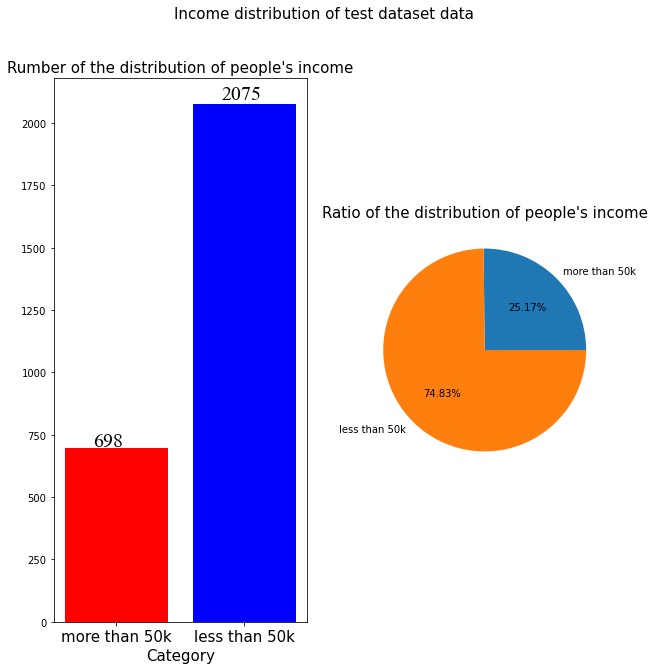

In [162]:
# Data analytics for test dataset
# The number of people earning more than 50k (Original data)
more_than_50k_test = len([salary for salary in df_global_test['salary'] if salary == " >50K"])
less_than_50k_test = len(df_global_test) - more_than_50k_test
ratio_more_than_50k_test = more_than_50k_test/(more_than_50k_test + less_than_50k_test)
ratio_less_than_50k_test = less_than_50k_test/(more_than_50k_test + less_than_50k_test)
salary_list_test = [more_than_50k_test, less_than_50k_test]
ratio_list_test = [ratio_more_than_50k_test, ratio_less_than_50k_test]

#Draw the graph
#Bar
ax1 = plt.figure(figsize=(10, 10))
plt.suptitle("Income distribution of test dataset data", fontsize=15)
plt.subplot(1,2,1)
plt.title("Rumber of the distribution of people's income", fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
fig_salary = plt.bar(['more than 50k', 'less than 50k'], salary_list_test, color=['r', 'b'])
autolabel(fig_salary)

#Pie
plt.subplot(1,2,2)
plt.title("Ratio of the distribution of people's income", fontsize=15)
plt.pie(ratio_list_test, labels=['more than 50k', 'less than 50k'], autopct="%.2f%%")
plt.savefig("Income distribution of test data.png")
ax1.show()